In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.simplefilter(action = "ignore")

In [3]:
data = pd.read_csv(r"F:\DSA\Assignments\Data\Social_Network_Ads.csv")

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
purchase_counts = data['Purchased'].value_counts()
purchase_counts

Purchased
0    257
1    143
Name: count, dtype: int64

In [7]:
data['EstimatedSalary'].nunique()

117

In [8]:
data['Age'].nunique()

43

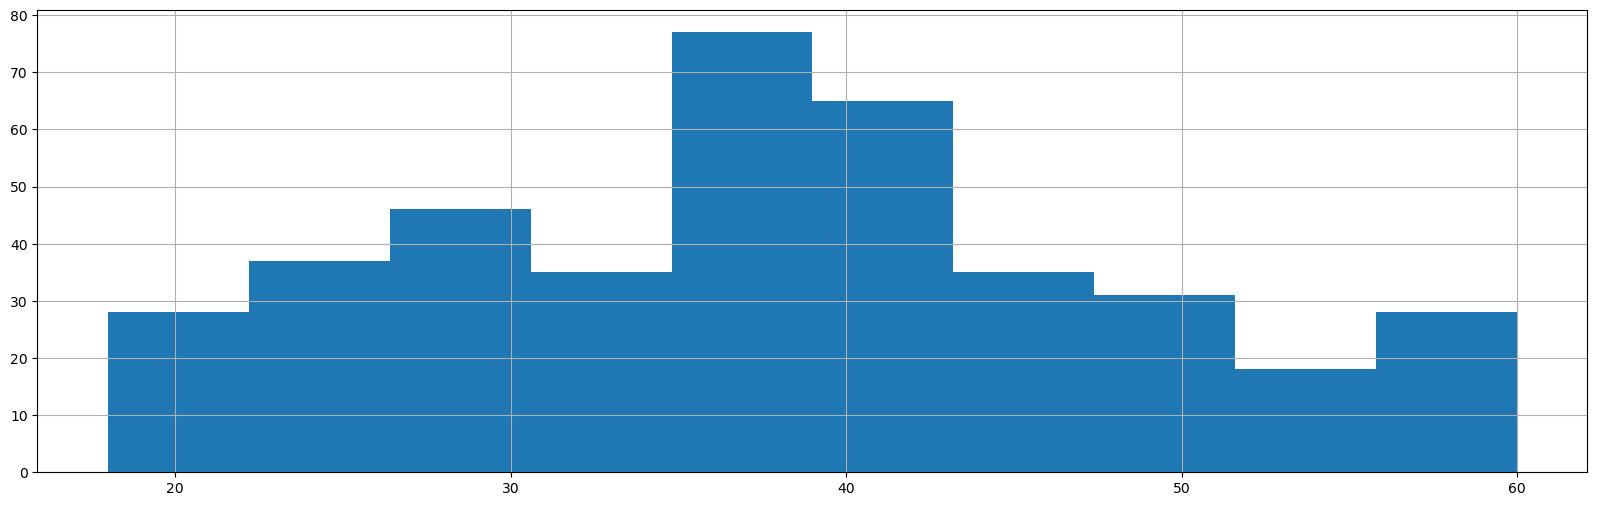

In [9]:
data['Age'].hist(figsize = (20,6))
plt.show()

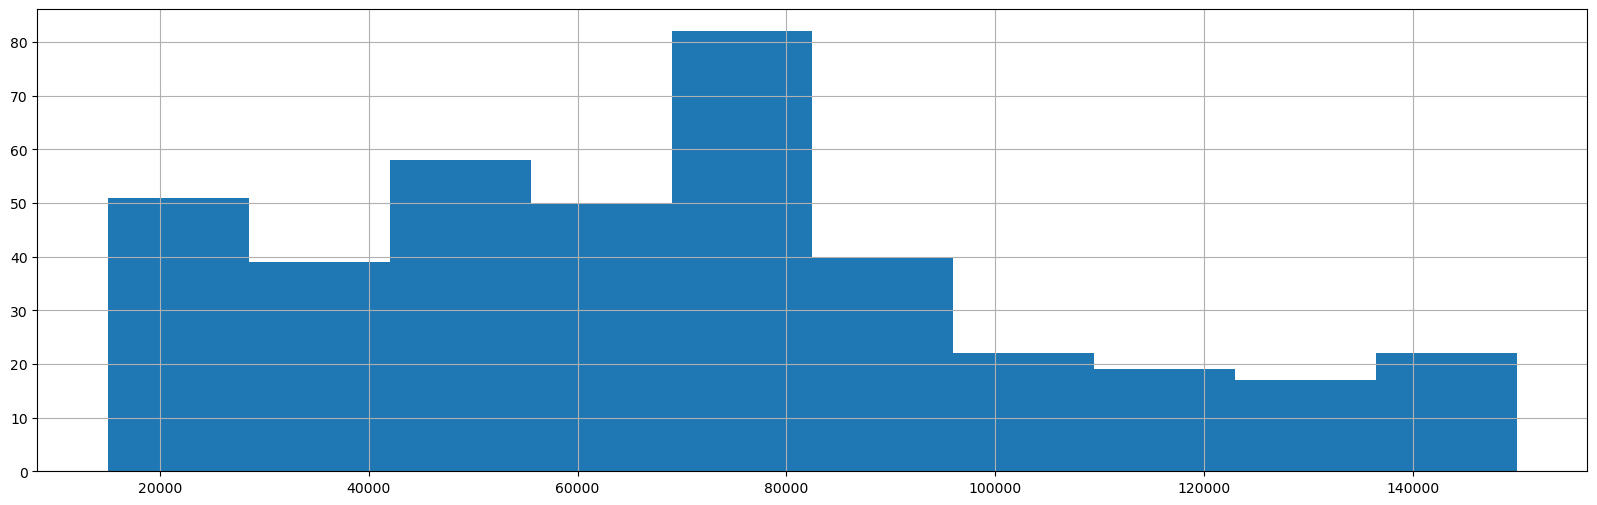

In [10]:
data['EstimatedSalary'].hist(figsize = (20,6))
plt.show()

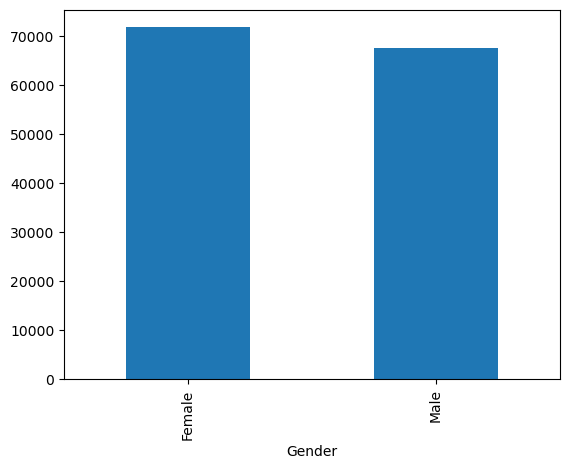

In [11]:
data.groupby('Gender')['EstimatedSalary'].mean().plot(kind = 'bar')
plt.show()

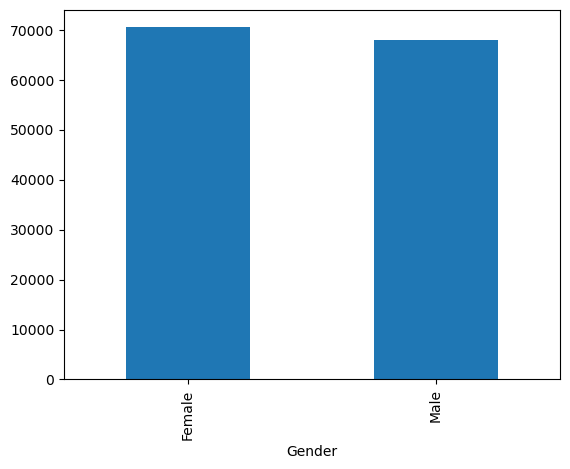

In [12]:
data.groupby('Gender')['EstimatedSalary'].median().plot(kind = 'bar')
plt.show()

In [13]:
from scipy.stats import chi2_contingency

In [14]:
contingency_table = pd.crosstab(data['Gender'], data['Purchased'])
contingency_table

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [15]:
chi2, pval, dof, exp = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", pval)

Chi-Square Statistic: 0.5550869364098915
p-value: 0.45624659183130645


**There's no real association between gender and purchase behavior. Since it's greater than 0.05, we fail to reject the null hypothesis of no association**

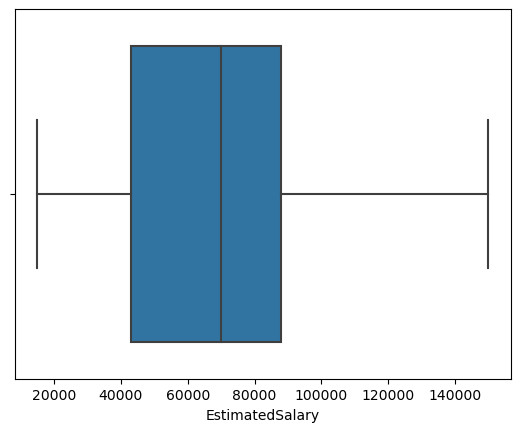

In [16]:
sns.boxplot(x = data['EstimatedSalary'])
plt.show()

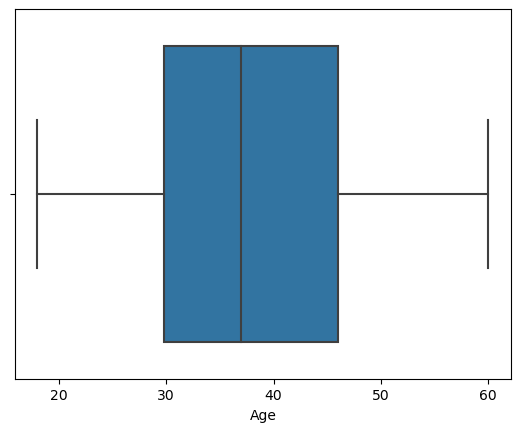

In [17]:
sns.boxplot(x = data['Age'])
plt.show()

In [18]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-100']

data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

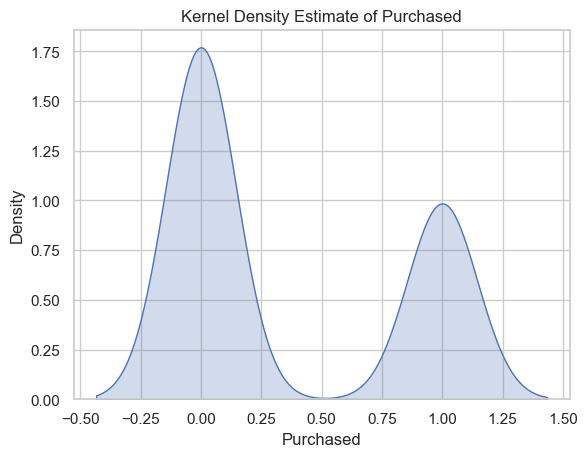

In [19]:
sns.set(style="whitegrid")
sns.kdeplot(data=data, x='Purchased', fill=True)
plt.xlabel('Purchased')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Purchased')
plt.show()

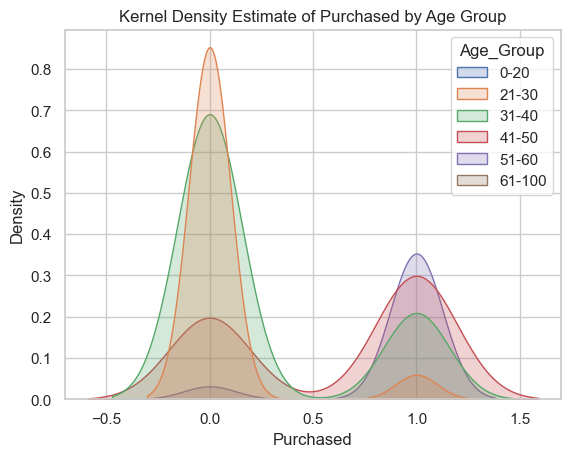

In [20]:
sns.set(style="whitegrid")
sns.kdeplot(data=data, x='Purchased', hue= 'Age_Group', fill=True)
plt.xlabel('Purchased')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Purchased by Age Group')
plt.show()

In [21]:
data.loc[data['Purchased']==1, 'Age_Group'].value_counts()

Age_Group
41-50     59
51-60     45
31-40     33
21-30      6
0-20       0
61-100     0
Name: count, dtype: int64

In [22]:
salary_bins = [15000, 30000, 60000, 90000, 120000, 150000] 
salary_labels = ['15k-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k']

data['Salary_Group'] = pd.cut(data['EstimatedSalary'], bins=salary_bins, labels=salary_labels)

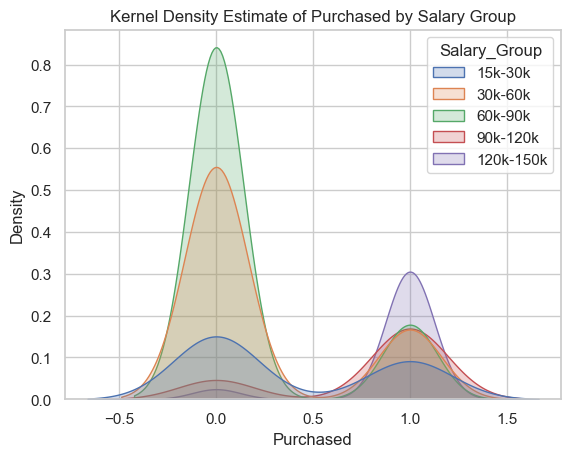

In [23]:
sns.set(style="whitegrid")
sns.kdeplot(data=data, x='Purchased', hue= 'Salary_Group', fill=True)
plt.xlabel('Purchased')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Purchased by Salary Group')
plt.show()

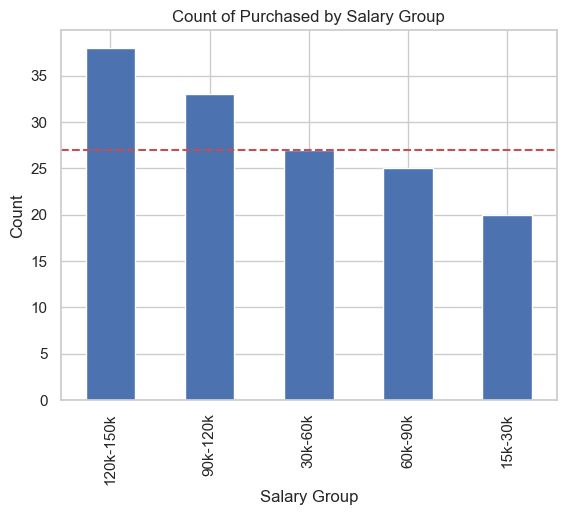

In [24]:
sg_p = data.loc[data['Purchased'] == 1, 'Salary_Group'].value_counts()
sg_p.plot(kind='bar')
plt.axhline(y=sg_p.median(), color='r', linestyle='--')
plt.xlabel('Salary Group')
plt.ylabel('Count')
plt.title('Count of Purchased by Salary Group')
plt.show()

In [25]:
sal_med = data['EstimatedSalary'].median()
purchase_med_salary = data.loc[data['EstimatedSalary']> sal_med, 'Purchased'].sum()
total_purchase = data['Purchased'].sum()
print(purchase_med_salary/total_purchase)

0.6573426573426573


### INSIGHTS

1. **The product has a high relation to the bin of user's age i.e, product is age specific.**
2. **People between 31 and 50 constitute majority of the purchased users.**
3. **The product is not Gender Specific.**
4. **Product grasp attention of people with salary greater than the median observation (65.7 %)**

In [26]:
from sklearn.model_selection import train_test_split
x = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [27]:
#Logistic_Regression

log_clf = LogisticRegression(max_iter = 1000, solver = 'liblinear')

In [28]:
#Fitting the model

log_clf.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [29]:
print(classification_report(y_test, log_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        63
           1       0.00      0.00      0.00        37

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100



In [30]:
#Decision Tree Classifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy')

In [31]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
print(classification_report(y_test, dt_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        63
           1       0.78      0.78      0.78        37

    accuracy                           0.84       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100



In [33]:
#Random Forest Classifier

rf_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, n_estimators = 200, n_jobs = -1)

In [34]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1)

In [35]:
print(classification_report(y_test, rf_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        63
           1       0.83      0.92      0.87        37

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.90      0.90      0.90       100



In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p=2)

In [37]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
print(classification_report(y_test, knn_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        63
           1       0.78      0.68      0.72        37

    accuracy                           0.81       100
   macro avg       0.80      0.78      0.79       100
weighted avg       0.81      0.81      0.81       100



In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits = 5)

In [40]:
from sklearn.metrics import accuracy_score

models = [log_clf, dt_clf, rf_clf, knn_clf]
scores = {}

for model in models:
    model_name = type(model).__name__ 
    cv_scores = cross_val_score(model, x, y, cv=skf, scoring='accuracy')
    scores[model_name] = cv_scores.mean()

In [41]:
scores

{'LogisticRegression': 0.6625,
 'DecisionTreeClassifier': 0.8150000000000001,
 'RandomForestClassifier': 0.86,
 'KNeighborsClassifier': 0.7625}

#### Let's proceed with Random Forest Classifier

In [42]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [43]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1)

In [44]:
data['Random Forest'] = rf_clf.predict(x) #Predicting for entire data

In [45]:
inaccuracy = data.loc[data['Random Forest']!=data['Purchased']].shape[0] #Checking for inaccuracy

In [46]:
(400 - inaccuracy)/400    #Accuracy calculation

0.9725

In [47]:
#Pickling the model

import pickle
with open('Random.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

### Model predicted 97% of the stats accurately